In [1]:
from utils.attributes import load_data

In [2]:
audios, labels = load_data()

In [3]:
from ensemble import Ensembler
from pathlib import Path

test_size = 0.2
audios_train, audios_test = audios[:int(len(audios) * (1 - test_size))], audios[int(len(audios) * (1 - test_size)):]
y_train, y_test = labels[:int(len(labels) * (1 - test_size))], labels[int(len(labels) * (1 - test_size)):]

ensembler_file = Path.cwd() / 'weights' / 'ensembler.joblib'

In [4]:
ensembler = Ensembler.create(['knn', 'svm', 'random_forest', 'logistic_regression'], preload=True)
# ensembler.train_each(audios_train, y_train)
ensembler.fit(audios_train, y_train)
ensembler.save(ensembler_file)

(480, 2)
(480, 2)
(480, 2)
(480, 2)
(480, 8)


In [5]:
# ensembler = Ensembler.load(ensembler_file, ['knn', 'svm', 'random_forest', 'logistic_regression'])
y_pred = ensembler.predict(audios_test)
# 120, 2

(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 8)


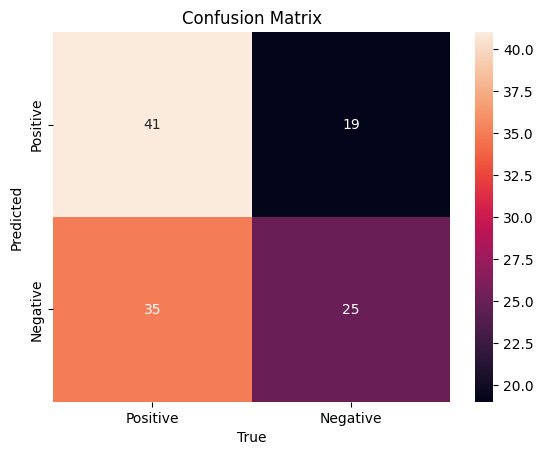

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
class_labels = ['Positive', 'Negative']
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

(120, 2)
(120, 2)
(120, 2)
(120, 2)
(120, 8)


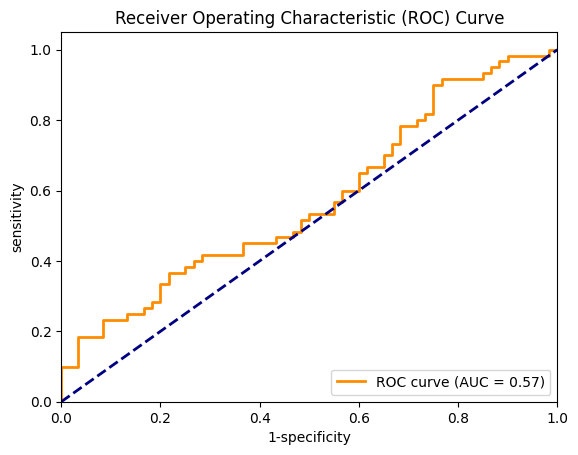

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain prediction probabilities (this returns probabilities for each class)
predictions_prob = ensembler.predict_proba(audios_test)

# For binary classification, get probabilities of the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob[:, 1])

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()